# 데이터

In [ ]:
# 데이터셋 불러오기, 데이터셋 머지

import pandas as pd
import os
import glob

# 폴더경로
folder_path = './Data/raw/datalab'

# 제_목적지 검색순위.csv
pattern = os.path.join(folder_path, '*제_목적지 검색순위.csv')
csv_files = glob.glob(pattern)

# 데이터셋 머지
dataframes = []
for file in csv_files:
    try:
        df = pd.read_csv(file, encoding='euc-kr')

        dataframes.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

combined_df = pd.concat(dataframes, ignore_index=True)

print(combined_df)

combined_df.to_csv('Merged_TMAP_SearchRank.csv', index=False)

     읍면동명       목적지명                 도로명주소     카테고리   구분  순위
0     강경읍   논산강경젓갈축제                충남 논산시  기타문화관광지  현지인   1
1     강경읍        강경역                충남 논산시     교통시설  현지인   2
2     강경읍     강경젓갈시장                충남 논산시       시장  현지인   3
3     강경읍        옥녀봉                충남 논산시  자연경관(산)  현지인   4
4     강경읍   강경산소금문학관     충남 논산시 강경포구길 38-0  기타문화관광지  현지인   5
...   ...        ...                   ...      ...  ...  ..
5483  횡성읍    횡성파크골프장    강원 횡성군 앞들동2로 45-19  육상레저스포츠   전체  22
5484  횡성읍        보광사  강원 횡성군 남산로160번길 75-0     종교성지   전체  24
5485  횡성읍    섬강게이트볼장       강원 횡성군 삼일로 93-0  기타레저스포츠   전체  24
5486  횡성읍        광제사     강원 횡성군 입석남1길 38-5     종교성지   전체  26
5487  횡성읍  전통음식휴선체험원  강원 횡성군 태기로개전4길 14-22     기타관광   전체  26

[5488 rows x 6 columns]


In [15]:
# 데이터셋 머지결과확인

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pathlib import Path
import os

# decimal points
%precision 4
pd.set_option("display.precision",4)

pd.read_csv('Merged_TMAP_SearchRank.csv',encoding='utf-8')
df=pd.read_csv('Merged_TMAP_SearchRank.csv',encoding='utf-8')
df

,읍면동명,목적지명,도로명주소,카테고리,구분,순위
0,강경읍,논산강경젓갈축제,충남 논산시,기타문화관광지,현지인,1
1,강경읍,강경역,충남 논산시,교통시설,현지인,2
2,강경읍,강경젓갈시장,충남 논산시,시장,현지인,3
3,강경읍,옥녀봉,충남 논산시,자연경관(산),현지인,4
4,강경읍,강경산소금문학관,충남 논산시 강경포구길 38-0,기타문화관광지,현지인,5
...,...,...,...,...,...,...
5483,횡성읍,횡성파크골프장,강원 횡성군 앞들동2로 45-19,육상레저스포츠,전체,22
5484,횡성읍,보광사,강원 횡성군 남산로160번길 75-0,종교성지,전체,24
5485,횡성읍,섬강게이트볼장,강원 횡성군 삼일로 93-0,기타레저스포츠,전체,24
5486,횡성읍,광제사,강원 횡성군 입석남1길 38-5,종교성지,전체,26


In [16]:
# df1: '구분' 열의 전체(=현지인+외지인) 데이터를 '미분류_현외'로 교체

import pandas as pd

# 1. CSV 파일 읽어오기
df = pd.read_csv('Merged_TMAP_SearchRank.csv', encoding='utf-8')

# 2. '구분' 열에서 값이 '전체'인 데이터를 '미분류_현외로' 변경
df.loc[df['구분'] == '전체', '구분'] = '미분류_현외'

# 3. 변경된 데이터프레임을 새로운 CSV 파일로 저장
df.to_csv('Merged_TMAP_SearchRank_Rev.csv', index=False, encoding='utf-8')
df

,읍면동명,목적지명,도로명주소,카테고리,구분,순위
0,강경읍,논산강경젓갈축제,충남 논산시,기타문화관광지,현지인,1
1,강경읍,강경역,충남 논산시,교통시설,현지인,2
2,강경읍,강경젓갈시장,충남 논산시,시장,현지인,3
3,강경읍,옥녀봉,충남 논산시,자연경관(산),현지인,4
4,강경읍,강경산소금문학관,충남 논산시 강경포구길 38-0,기타문화관광지,현지인,5
...,...,...,...,...,...,...
5483,횡성읍,횡성파크골프장,강원 횡성군 앞들동2로 45-19,육상레저스포츠,미분류_현외,22
5484,횡성읍,보광사,강원 횡성군 남산로160번길 75-0,종교성지,미분류_현외,24
5485,횡성읍,섬강게이트볼장,강원 횡성군 삼일로 93-0,기타레저스포츠,미분류_현외,24
5486,횡성읍,광제사,강원 횡성군 입석남1길 38-5,종교성지,미분류_현외,26


# 적합도 검정

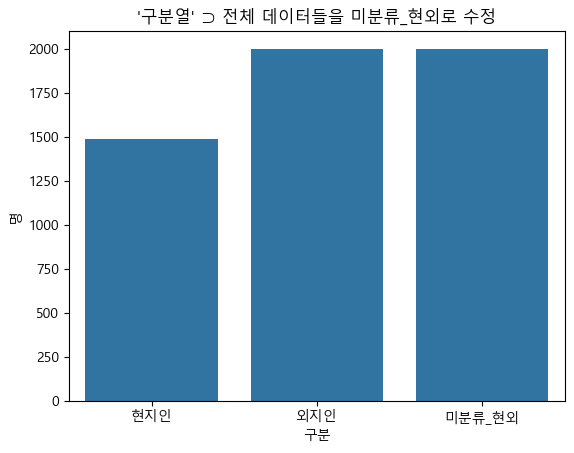

In [17]:
# BarChart

# 불러올 데이터프레임
df

# 한글 폰트 라이브러리 불러오기
from matplotlib import font_manager

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 윈도우의 폰트경로 'Malgun Gothic'
font_prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = font_prop.get_name()

# Barplot 생성
sns.countplot(x='구분', data=df)

# 레이블 및 제목 설정
plt.xlabel('구분')
plt.ylabel('명')
plt.title("'구분열' ⊃ 전체 데이터들을 미분류_현외로 수정")

# 그래프 표시
plt.show()

방문자유형인 '구분'열의 '전체' 데이터들을 '미분류_현외'로 재분류(Barchart시각화인지)

최적 외지인 비율 (x): 0.5736
최소 차이: 1.8010
최적 현지인 비율 (1-x): 0.4264


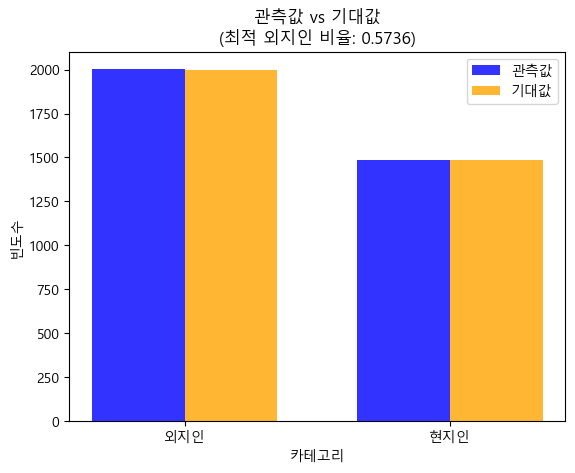

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_difference(x, observed_counts, total):
    "주어진 외지인 비율(x)에서의 차이 계산"
    expected_counts = [total * x, total * (1 - x)]
    return np.sum((np.array(observed_counts) - np.array(expected_counts))**2)

def plot_bar_chart(observed_counts, expected_counts, optimal_x):
    "관측값 vs 기대값 비교 그래프 그리기"
    categories = ['외지인', '현지인']
    bar_width = 0.35
    index = np.arange(len(categories))

    plt.bar(index - bar_width / 2, observed_counts, bar_width, alpha=0.8, label='관측값', color='blue')
    plt.bar(index + bar_width / 2, expected_counts, bar_width, alpha=0.8, label='기대값', color='orange')

    # 그래프 제목과 레이블 추가
    plt.xlabel('카테고리')
    plt.ylabel('빈도수')
    plt.title(f'관측값 vs 기대값\n(최적 외지인 비율: {optimal_x:.4f})')
    plt.xticks(index, categories)
    plt.legend()
    plt.show()

def main():
    # 데이터 로드
    df = pd.read_csv('Merged_TMAP_SearchRank_Rev.csv', encoding='utf-8')

    # '구분' 열에서 '외지인'과 '현지인'만 필터링
    filtered_df = df[df['구분'].isin(['외지인', '현지인'])]

    # 총 데이터 수 및 관측값 계산
    total = len(filtered_df)
    observed_counts = [np.sum(filtered_df['구분'] == category) for category in ['외지인', '현지인']]

    # 외지인 비율(x)을 0부터 1까지 변화시키며 최소 차이 찾기
    x_values = np.linspace(0, 1, 1000)
    differences = [calculate_difference(x, observed_counts, total) for x in x_values]
    optimal_x = x_values[np.argmin(differences)]  # 최소 차이를 갖는 x값

    # 기대값 계산
    expected_counts = [total * optimal_x, total * (1 - optimal_x)]

    # 결과 출력
    print(f"최적 외지인 비율 (x): {optimal_x:.4f}")
    print(f"최소 차이: {min(differences):.4f}")
    print(f'최적 현지인 비율 (1-x): {1 - optimal_x:.4f}')

    # 그래프 출력
    plot_bar_chart(observed_counts, expected_counts, optimal_x)

# 실행
main()

[순위           1   2   3   4   5   6   7   8   9   10  ...  59  60  61  62  63  \
카테고리                                                 ...                       
공연시설          4   3  11  16  20  10  15  11  11  10  ...   0   0   0   0   0   
공예체험          0   0   0   0   0   0   0   0   1   0  ...   1   1   0   1   1   
교통시설         34  25  32  26  26   3  11  14   9   6  ...   0   0   0   0   0   
기타관광         16  19  11  23  19  21  18  10  23  10  ...   2   0   0   1   0   
기타레저스포츠       0   2   6   2   2  11  13   6   8  12  ...   1   0   1   0   0   
기타문화관광지      28  35  30  27  21  13  18  13   7   7  ...   0   0   0   0   0   
기타쇼핑시설        0   0   0   0   0   1   2   2   1   4  ...   0   0   0   0   0   
농/산/어촌체험      2   1   1   4   6   1   0   4   5   1  ...   0   2   0   0   1   
대형마트          4   2   1   4   4   0   0   0   0   0  ...   0   0   0   0   0   
데이트코스         0   0   2   0   0   0   0   3   1   0  ...   0   0   0   0   0   
도시/지역문화관광     0   0   0   0   3   0   0

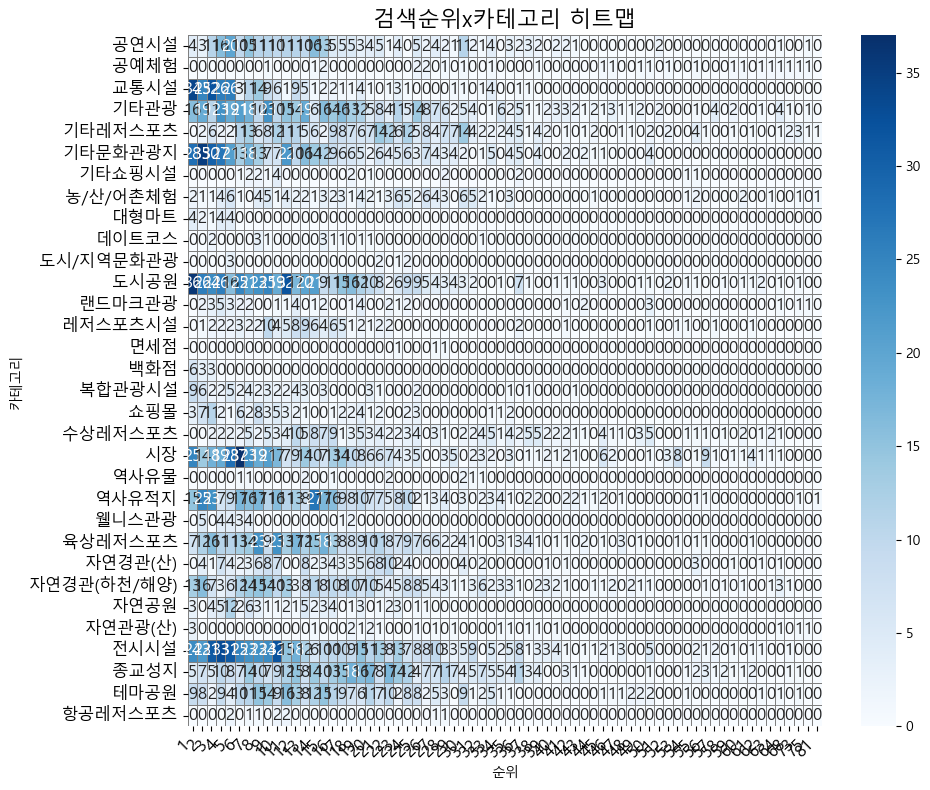

In [ ]:
# 교차표, 히트맵 시각화

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 윈도우의 폰트경로 'Malgun Gothic'
font_prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = font_prop.get_name()

# 데이터 로드
df = pd.read_csv('Merged_TMAP_SearchRank_Rev.csv', encoding='utf-8')

# '구분' 열에서 '외지인'과 '현지인'만 필터링
filtered_df = df[df['구분'].isin(['외지인', '현지인'])]

# 교차분석표 생성&확인: '구분'과 다른 범주형 변수(예: '카테고리') 간의 교차분석표
contingency_table = pd.crosstab(df['카테고리'], df['순위'])
ct=contingency_table = pd.crosstab(df['카테고리'], df['순위'])
print([ct])

# 교차분석표를 히트맵으로 시각화
plt.figure(figsize=(10, 8))  # 히트맵 크기 조정

# 히트맵 시각화
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar=True, 
            linewidths=0.5, linecolor='gray', annot_kws={'size': 12},  # 텍스트 크기 조정
            xticklabels=contingency_table.columns, 
            yticklabels=contingency_table.index)

# x축, y축 레이블 회전 및 폰트 크기 조정
plt.xticks(rotation=45, ha='right', fontsize=12)  # x축 레이블 45도 회전
plt.yticks(rotation=0, fontsize=12)  # y축 레이블 0도 회전

# 그래프 제목
plt.title('검색순위x카테고리 히트맵', fontsize=16)

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

In [ ]:
# 교차테이블 행별 합 큰 순서대로 정렬

import pandas as pd

# 교차 테이블 생성
contingency_table = pd.crosstab(df['카테고리'], df['순위'])
ct = contingency_table = pd.crosstab(df['카테고리'], df['순위'])

# '순위' 값이 1부터 10까지인 데이터만 선택 (열 선택)
filtered_ct = contingency_table.iloc[:, 0:10]

# 각 행의 합계를 계산
row_sums = filtered_ct.sum(axis=1)

# 합계가 큰 순서대로 행 정렬
sorted_rows = row_sums.sort_values(ascending=False)

# 합계 순서로 교차 테이블 정렬
sorted_ct = filtered_ct.loc[sorted_rows.index]

# 합계 출력
print("행 합계:")
print(sorted_rows)

# 정렬된 교차 테이블 출력
print("\n정렬된 교차 테이블:")
sorted_ct

행 합계:
카테고리
전시시설           268
도시공원           241
시장             221
기타문화관광지        199
교통시설           186
기타관광           170
역사유적지          156
육상레저스포츠        139
공연시설           111
자연경관(하천/해양)    110
테마공원            91
종교성지            82
기타레저스포츠         62
쇼핑몰             48
자연경관(산)         42
자연공원            37
복합관광시설          37
레저스포츠시설         28
농/산/어촌체험        25
수상레저스포츠         23
웰니스관광           20
랜드마크관광          18
대형마트            15
백화점             12
기타쇼핑시설          10
데이트코스            6
항공레저스포츠          6
도시/지역문화관광        3
자연관광(산)          3
역사유물             2
공예체험             1
면세점              0
dtype: int64

정렬된 교차 테이블:


순위,1,2,3,4,5,6,7,8,9,10
카테고리,,,,,,,,,,
전시시설,24,22,31,33,31,25,23,23,24,32
도시공원,36,26,24,26,16,25,21,23,25,19
시장,25,14,18,19,28,37,23,19,21,17
기타문화관광지,28,35,30,27,21,13,18,13,7,7
교통시설,34,25,32,26,26,3,11,14,9,6
기타관광,16,19,11,23,19,21,18,10,23,10
역사유적지,15,25,23,7,9,17,16,17,11,16
육상레저스포츠,7,12,16,11,11,13,14,23,9,23
공연시설,4,3,11,16,20,10,15,11,11,10


구분
외지인    3148
현지인    2340
Name: count, dtype: int64


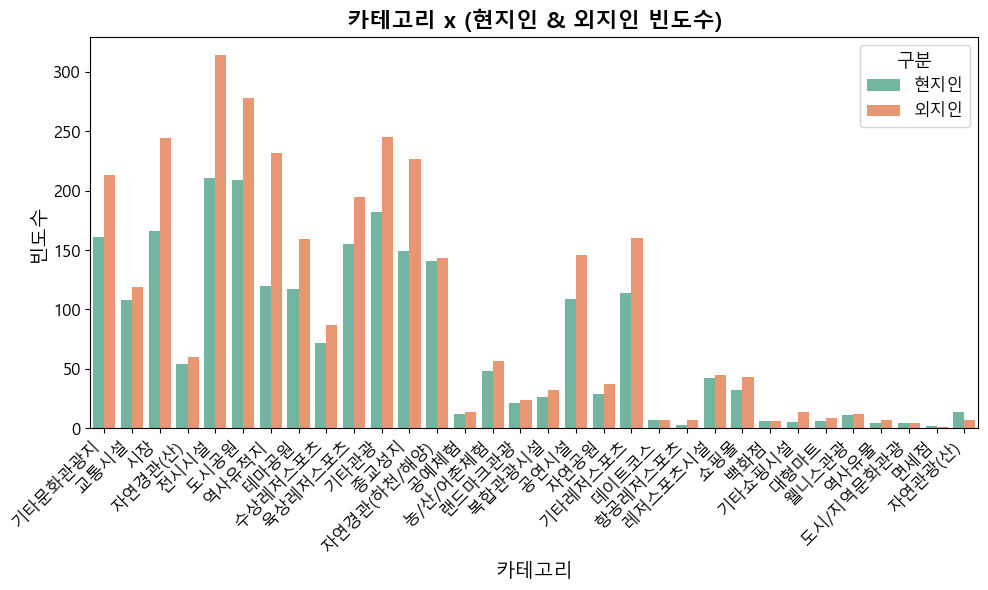

In [ ]:
# 코드 가독성, 시각화 가독성 반영
# 외지인 57.36% : 현지인 42.64% 반영

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('Merged_TMAP_SearchRank_Rev.csv', encoding='utf-8')

# '미분류_현지인or외지인' 값의 빈도수를 추출
unclassified_count = df[df['구분'] == '미분류_현외'].shape[0]

# 외지인 57.36%, 현지인 42.64% 비율로 수정
external_count = int(unclassified_count * 0.5736)  # 외지인 비율
local_count = unclassified_count - external_count  # 현지인 비율

# '미분류_현외'를 외지인과 현지인으로 분할하여 기존 외지인과 현지인 수에 반영
df.loc[df['구분'] == '미분류_현외', '구분'] = ['외지인'] * external_count + ['현지인'] * local_count

# 결과 확인
print(df['구분'].value_counts())

# 그룹화된 막대 그래프 시각화
plt.figure(figsize=(10, 6))  # 그래프 크기 조정

# countplot 그리기
sns.countplot(data=df, x='카테고리', hue='구분', palette='Set2')

# 제목 추가
plt.title('카테고리 x (현지인 & 외지인 빈도수)', fontsize=16, fontweight='bold')

# 축 레이블 추가
plt.xlabel('카테고리', fontsize=14)
plt.ylabel('빈도수', fontsize=14)

# x축 레이블 회전 및 레이아웃 조정
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# 범례 위치 및 크기 조정
plt.legend(title='구분', fontsize=12, title_fontsize=13, loc='upper right')

# 레이아웃 조정 (레이블이 잘리지 않도록)
plt.tight_layout()

# 그래프 표시
plt.show()

구분
외지인    3148
현지인    2340
Name: count, dtype: int64


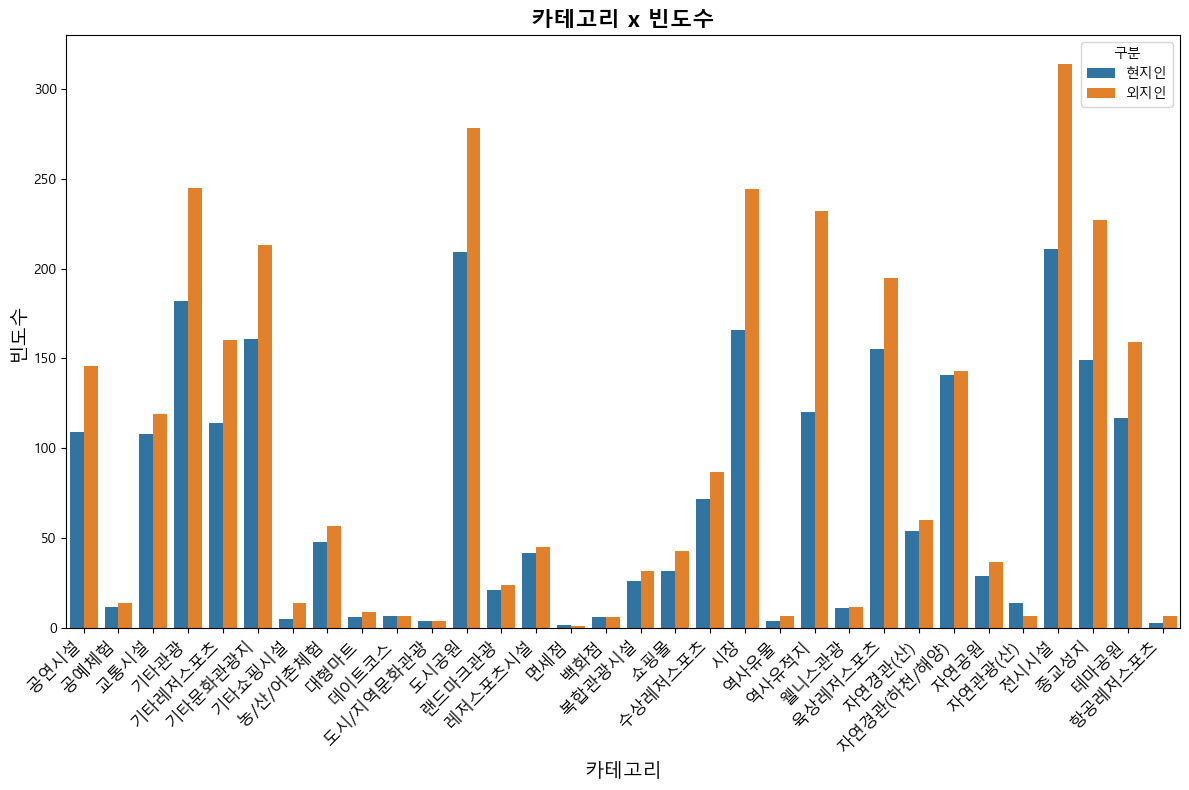

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 한글 폰트 설정 (윈도우에서 사용 가능)
font_path = "C:/Windows/Fonts/malgun.ttf"  # 윈도우의 폰트경로 'Malgun Gothic'
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = True  # 마이너스 기호 문제 해결

# 데이터 로드
df = pd.read_csv('Merged_TMAP_SearchRank_Rev.csv', encoding='utf-8')

# '미분류_현지인or외지인'을 외지인과 현지인으로 분할
def classify_residents(df):
    unclassified_count = df[df['구분'] == '미분류_현외'].shape[0]
    external_count = int(unclassified_count * 0.5736)
    local_count = unclassified_count - external_count
    df.loc[df['구분'] == '미분류_현외', '구분'] = ['외지인'] * external_count + ['현지인'] * local_count
    return df

df = classify_residents(df)

# 구분별 빈도수 출력
print(df['구분'].value_counts())

# 카테고리별, 구분별 빈도수 계산 후 변환
count_data = df.groupby(['카테고리', '구분']).size().unstack(fill_value=0).reset_index()

# 카테고리별 구분을 긴 형식으로 변환 (그래프에 적합)
melted_data = count_data.melt(id_vars=['카테고리'], value_vars=['현지인', '외지인'], var_name='구분', value_name='빈도수')

# 클러스터형 막대 그래프
plt.figure(figsize=(12, 8))  # 그래프 크기 조정
sns.barplot(x='카테고리', y='빈도수', hue='구분', data=melted_data)

# 그래프 제목 및 레이블 설정
plt.title('카테고리 x 빈도수', fontsize=16, fontweight='bold')
plt.xlabel('카테고리', fontsize=14)
plt.ylabel('빈도수', fontsize=14)

# x축 레이블 회전 및 레이아웃 최적화
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

# 그래프 표시
plt.show()

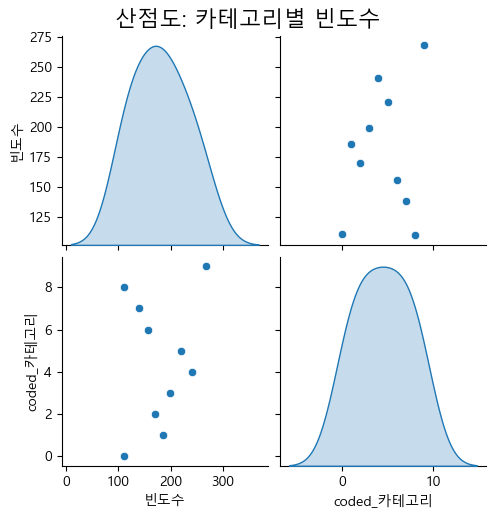

In [26]:
# 산점도

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 입력
categories = ['전시시설', '도시공원', '시장', '기타문화관광지', '교통시설', 
              '기타관광', '역사유적지', '육상레저스포츠', '공연시설', '자연경관(하천/해양)']
values = [268, 241, 221, 199, 186, 170, 156, 139, 111, 110]

# 데이터프레임 생성
data = pd.DataFrame({'카테고리': categories, '빈도수': values})

# 카테고리를 숫자로 매핑
data['coded_카테고리'] = data['카테고리'].astype('category').cat.codes

# 산점도 행렬 생성
sns.pairplot(data, vars=['빈도수', 'coded_카테고리'], diag_kind='kde', height=2.5)

# 그래프 제목 추가
plt.suptitle('산점도: 카테고리별 빈도수', y=1.02, fontsize=16)

# 그래프 표시
plt.show()

<Figure size 5000x5000 with 0 Axes>

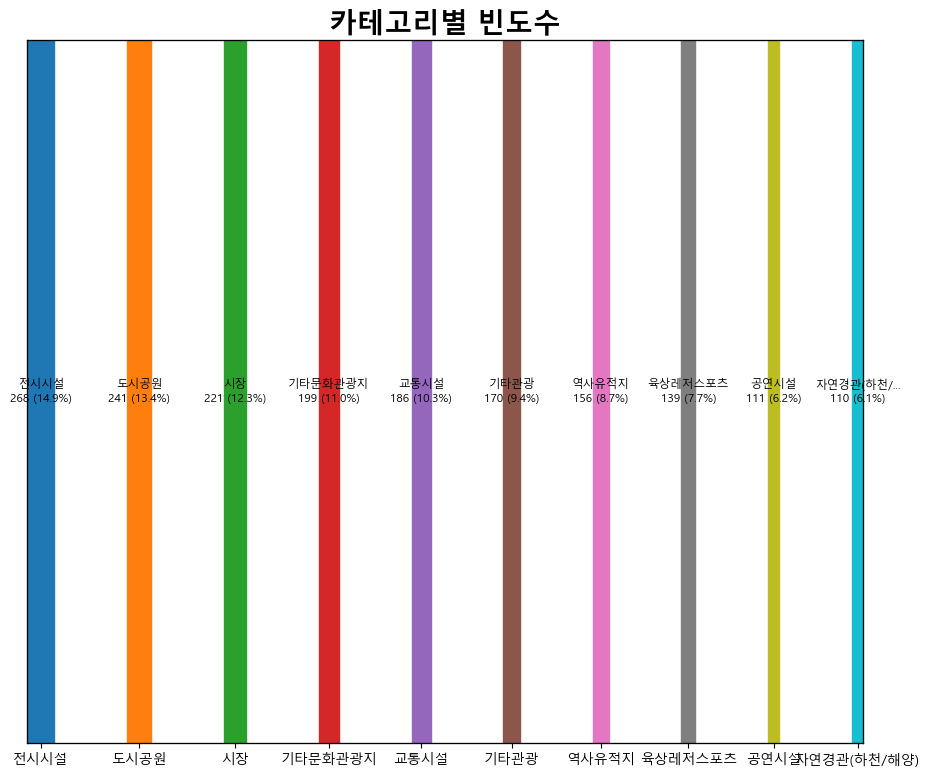

In [27]:
# 모자이크 플롯

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# 데이터 준비
categories = ['전시시설', '도시공원', '시장', '기타문화관광지', '교통시설', 
              '기타관광', '역사유적지', '육상레저스포츠', '공연시설', '자연경관(하천/해양)']
values = [268, 241, 221, 199, 186, 170, 156, 139, 111, 110]

# 모자이크 플롯에 사용할 데이터 변환
mosaic_data = {category: value for category, value in zip(categories, values)}

# 사용자 정의 레이블 함수
def format_label(key):
    """모자이크 플롯 내 각 구역의 레이블을 설정"""
    category = key[0]  # 카테고리 추출
    value = mosaic_data[category]
    percentage = value / sum(mosaic_data.values()) * 100
    # 짧은 카테고리를 1줄로, 긴 카테고리는 여러 줄로 나눠 표시
    return f"{category[:8] + ('...' if len(category) > 8 else '')}\n{value} ({percentage:.1f}%)"

# 색상 매핑
colors = plt.cm.tab10(range(len(categories)))

# 모자이크 플롯 그리기
plt.figure(figsize=(50,50))
mosaic(mosaic_data,
       labelizer=format_label,
       gap=0.4,  # 간격 설정으로 카테고리 구분 명확
       properties=lambda key: {'color': colors[categories.index(key[0])]})

# 그래프 제목
plt.title('카테고리별 빈도수', fontsize=20, fontweight='bold')

# 여백 최적화
plt.tight_layout(pad=-10)

# 그래프 표시
plt.show()

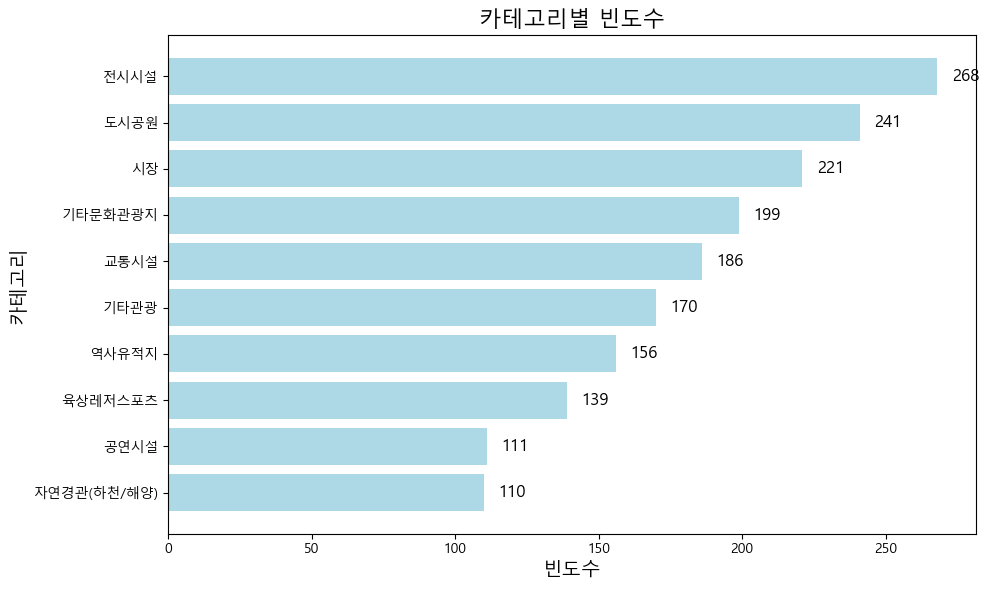

In [28]:
import matplotlib.pyplot as plt

# 데이터 입력
categories = ['전시시설', '도시공원', '시장', '기타문화관광지', '교통시설', 
              '기타관광', '역사유적지', '육상레저스포츠', '공연시설', '자연경관(하천/해양)']
values = [268, 241, 221, 199, 186, 170, 156, 139, 111, 110]

# values와 categories를 값에 따라 내림차순으로 정렬
sorted_categories, sorted_values = zip(*sorted(zip(categories, values), key=lambda x: x[1], reverse=True))

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 수평 막대그래프 생성
plt.barh(sorted_categories, sorted_values, color='lightblue')

# 그래프 제목 및 레이블 설정
plt.title('카테고리별 빈도수', fontsize=16)
plt.xlabel('빈도수', fontsize=14)
plt.ylabel('카테고리', fontsize=14)

# y축을 반대로 설정 (값이 큰 것이 위에 오도록)
plt.gca().invert_yaxis()

# 각 막대에 값 표시
for i, value in enumerate(sorted_values):
    plt.text(value + 5, i, str(value), va='center', fontsize=12)

# 레이아웃 최적화
plt.tight_layout()

# 그래프 표시
plt.show()

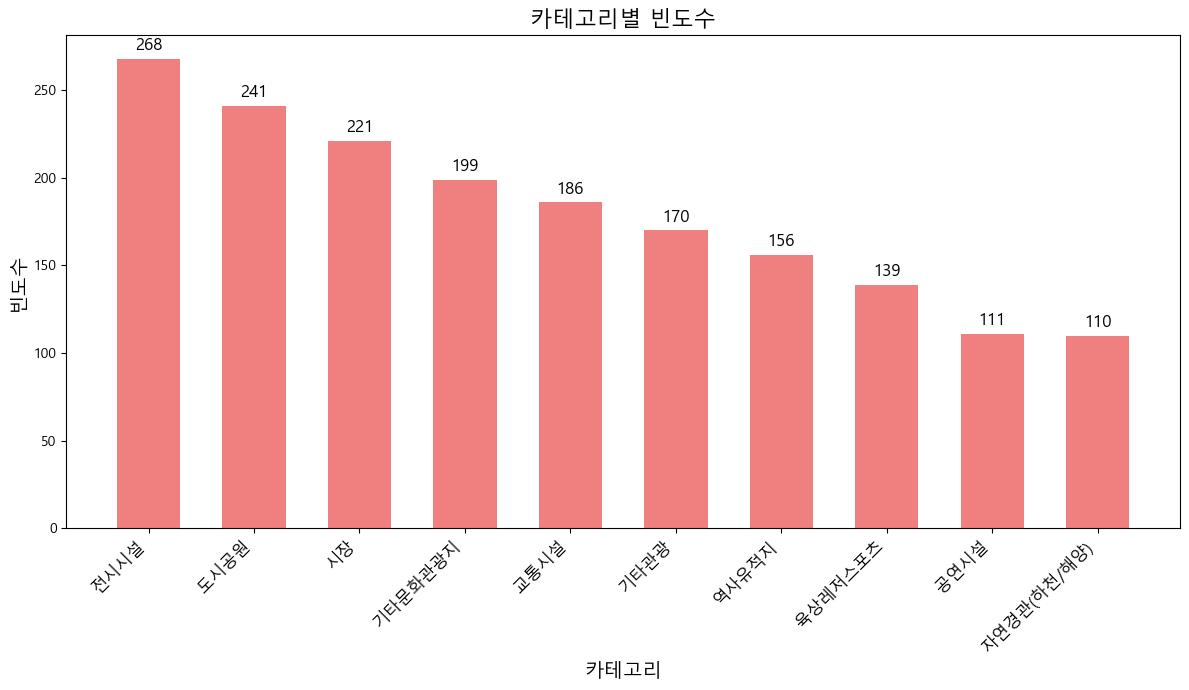

In [29]:
import matplotlib.pyplot as plt

# 데이터 입력
categories = ['전시시설', '도시공원', '시장', '기타문화관광지', '교통시설', 
              '기타관광', '역사유적지', '육상레저스포츠', '공연시설', '자연경관(하천/해양)']
values = [268, 241, 221, 199, 186, 170, 156, 139, 111, 110]

# 그래프 크기 설정
plt.figure(figsize=(12, 7))

# 세로 막대그래프 생성, 막대 간격을 넓게 설정
plt.bar(categories, values, color='lightcoral', width=0.6)

# 그래프 제목 및 레이블 설정
plt.title('카테고리별 빈도수', fontsize=16)
plt.xlabel('카테고리', fontsize=14)
plt.ylabel('빈도수', fontsize=14)

# 각 막대에 값 표시
for i, value in enumerate(values):
    plt.text(i, value + 5, str(value), ha='center', fontsize=12)

# x축 레이블 회전하여 읽기 쉽게 설정
plt.xticks(rotation=45, ha='right', fontsize=12)

# 레이아웃 최적화
plt.tight_layout()

# 그래프 표시
plt.show()